In [1]:
!pip install pandas
!pip install xlrd
!pip install sklearn
!pip install imblearn

  Using cached https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e6/62/08c14224a7e242df2cef7b312d2ef821c3931ec9b015ff93bb52ec8a10a3/imbalanced_learn-0.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/75/14/fde90de4fc6722303ddbc183ec253c288dae8c7e4eb5a069ac49f14c9a0f/scikit_learn-0.21.2-cp37-cp37m-win_amd64.whl
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [2]:
import xlrd
book = xlrd.open_workbook("Datasheets info.xlsx")
sheetMQ2 = book.sheet_by_name("MQ2 - Pololulu")
sheetMQ3 = book.sheet_by_name("MQ3 - Sparkfun")
sheetMQ4 = book.sheet_by_name("MQ4 - Sparkfun")
sheetMQ5 = book.sheet_by_name("MQ5 - Sparkfun")
sheetMQ6 = book.sheet_by_name("MQ6 - Sparkfun")
sheetMQ7 = book.sheet_by_name("MQ7 - Sparkfun")
sheetMQ8 = book.sheet_by_name("MQ8 - Sparkfun")
sheetMQ9 = book.sheet_by_name("MQ9 - Haoyuelectronics")
sheetMQ131 = book.sheet_by_name("MQ131- Sensorsportal")
sheetMQ135 = book.sheet_by_name("MQ135 - HANWEI")
sheetMQ303A = book.sheet_by_name("MQ303A - HANWEI")
sheetMQ309A = book.sheet_by_name("MQ309A - HANWEI")

In [3]:
for row_index in range(1,20): #reading first columns
    RsR0, H2, LPG, CH4, CO, Alcohol, propane = sheetMQ2.row_values(row_index, start_colx=0, end_colx=7)
    print(RsR0, "	", H2, "	", LPG, "	", CH4, "	", CO, "	", Alcohol, "	", propane)
 

RS/R0 	 H2 	 LPG 	 CH4 	 CO 	 Alcohol 	 Propane
0.1 	  	  	  	  	  	 
0.2 	  	  	  	  	  	 
0.3 	  	  	  	  	  	 
0.4 	  	  	  	  	  	 
0.5 	  	  	  	  	  	 
0.6 	  	 2000.0 	  	  	  	 2000.0
0.7 	 2100.0 	  	  	  	  	 
0.8 	  	 1000.0 	  	  	  	 1000.0
0.9 	  	 800.0 	 5000.0 	  	 5000.0 	 800.0
1.0 	 1000.0 	  	  	  	  	 
2.0 	 201.0 	  	 800.0 	  	 500.0 	 
3.0 	  	  	 200.0 	 1000.0 	 200.0 	 
4.0 	  	  	  	 500.0 	  	 
5.0 	  	  	  	 200.0 	  	 
6.0 	  	  	  	  	  	 
7.0 	  	  	  	  	  	 
8.0 	  	  	  	  	  	 
9.0 	  	  	  	  	  	 


In [4]:
x_MQ2 = sheetMQ2.col_values(0)[2:]
MQ2_H2 = sheetMQ2.col_values(1)[2:]
MQ2_LPG = sheetMQ2.col_values(2)[2:]
MQ2_CH4 = sheetMQ2.col_values(3)[2:]
MQ2_CO = sheetMQ2.col_values(4)[2:]
MQ2_Alcohol = sheetMQ2.col_values(5)[2:]
MQ2_propane = sheetMQ2.col_values(6)[2:]

In [5]:
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

In [6]:
MQ2_H2 =zero_to_nan(MQ2_H2)
MQ2_LPG =zero_to_nan(MQ2_LPG)
MQ2_CH4 =zero_to_nan(MQ2_CH4)
MQ2_CO =zero_to_nan(MQ2_CO)
MQ2_Alcohol =zero_to_nan(MQ2_Alcohol)
MQ2_propane =zero_to_nan(MQ2_propane)

In [31]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import linear_model

dataH2 = {'RsRo': x_MQ2, 'H2': MQ2_H2}
dataLPG = {'RsRo': x_MQ2, 'LPG': MQ2_LPG}
dataCH4 = {'RsRo': x_MQ2, 'CH4': MQ2_CH4}
dataCO = {'RsRo': x_MQ2, 'CO': MQ2_CO}
dataAlcohol = {'RsRo': x_MQ2, 'Alcohol': MQ2_Alcohol}
dataPropane = {'RsRo': x_MQ2, 'Propane': MQ2_propane}

dfMQ2_H2 = pd.DataFrame(dataH2)
dfMQ2_LPG = pd.DataFrame(dataLPG)
dfMQ2_CH4 = pd.DataFrame(dataCH4)
dfMQ2_CO = pd.DataFrame(dataCO)
dfMQ2_Alcohol = pd.DataFrame(dataAlcohol)
dfMQ2_Propane = pd.DataFrame(dataPropane)

dfMQ2_H2['H2'] = pd.to_numeric(dfMQ2_H2['H2'])
dfMQ2_LPG['LPG'] = pd.to_numeric(dfMQ2_LPG['LPG'])
dfMQ2_CH4['CH4'] = pd.to_numeric(dfMQ2_CH4['CH4'])
dfMQ2_CO['CO'] = pd.to_numeric(dfMQ2_CO['CO'])
dfMQ2_Alcohol['Alcohol'] = pd.to_numeric(dfMQ2_Alcohol['Alcohol'])
dfMQ2_Propane['Propane'] = pd.to_numeric(dfMQ2_Propane['Propane'])

dfMQ2_H2['H2'] = dfMQ2_H2['H2'].replace('',None, regex=True)
dfMQ2_LPG['LPG'] = dfMQ2_LPG['LPG'].replace('',None, regex=True)
dfMQ2_CH4['CH4'] = dfMQ2_CH4['CH4'].replace('',None, regex=True)
dfMQ2_CO['CO'] = dfMQ2_CO['CO'].replace('',None, regex=True)
dfMQ2_Alcohol['Alcohol'] = dfMQ2_Alcohol['Alcohol'].replace('',None, regex=True)
dfMQ2_Propane['Propane'] = dfMQ2_Propane['Propane'].replace('',None, regex=True)

#Global X_Predict variable
X_Predict = dfMQ2_H2.RsRo.apply(lambda x: [x]).tolist()

In [41]:
#Model and train
dataset2TrainH2 = dfMQ2_H2.copy()
dataset2TrainH2.dropna(inplace=True)
X_trainH2 = dataset2TrainH2.RsRo.apply(lambda x: [x]).tolist()
y_trainH2 = dataset2TrainH2['H2'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainH2, y_trainH2)
#Predict
H2_Predicted = model.predict(X_Predict)
#save into MQ2
MQ2_H2 = H2_Predicted

In [42]:
#Model and train
dataset2TrainLPG = dfMQ2_LPG.copy()
dataset2TrainLPG.dropna(inplace=True)
X_trainLPG = dataset2TrainLPG.RsRo.apply(lambda x: [x]).tolist()
y_trainLPG = dataset2TrainLPG['LPG'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainLPG, y_trainLPG)
#Predict
LPG_Predicted = model.predict(X_Predict)
#save into MQ2
MQ2_LPG = LPG_Predicted

In [43]:
#Model and train
dataset2TrainCH4 = dfMQ2_CH4.copy()
dataset2TrainCH4.dropna(inplace=True)
X_trainCH4 = dataset2TrainCH4.RsRo.apply(lambda x: [x]).tolist()
y_trainCH4 = dataset2TrainCH4['CH4'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainCH4, y_trainCH4)
#Predict
CH4_Predicted = model.predict(X_Predict)
#save into MQ2
MQ2_CH4 = CH4_Predicted

In [45]:
#Model and train
dataset2TrainCO = dfMQ2_CO.copy()
dataset2TrainCO.dropna(inplace=True)
X_trainCO = dataset2TrainCO.RsRo.apply(lambda x: [x]).tolist()
y_trainCO = dataset2TrainCO['CO'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainCO, y_trainCO)
#Predict
CO_Predicted = model.predict(X_Predict)
#save into MQ2
MQ2_CO = CO_Predicted

In [46]:
#Model and train
dataset2TrainAlcohol = dfMQ2_Alcohol.copy()
dataset2TrainAlcohol.dropna(inplace=True)
X_trainAlcohol = dataset2TrainAlcohol.RsRo.apply(lambda x: [x]).tolist()
y_trainAlcohol = dataset2TrainAlcohol['Alcohol'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainAlcohol, y_trainAlcohol)
#Predict
Alcohol_Predicted = model.predict(X_Predict)
#save into MQ2
MQ2_Alcohol = Alcohol_Predicted

In [59]:
#Model and train
dataset2TrainPropane = dfMQ2_Propane.copy()
dataset2TrainPropane.dropna(inplace=True)
X_trainPropane = dataset2TrainPropane.RsRo.apply(lambda x: [x]).tolist()
y_trainPropane = dataset2TrainPropane['Propane'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainPropane, y_trainPropane)
#Predict
Propane_Predicted = model.predict(X_Predict)
#save into MQ2
MQ2_propane = Propane_Predicted

Text(0, 0.5, 'Rs/Ro')

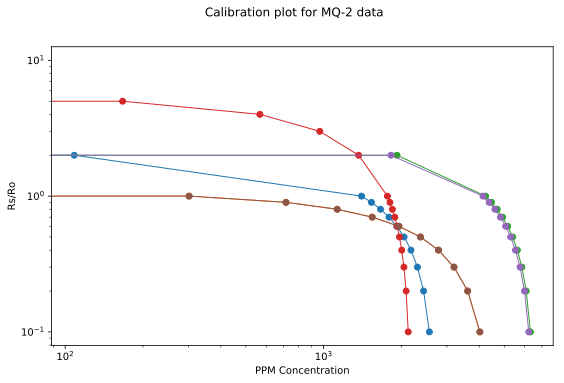

In [61]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()

fig.set_size_inches(9, 5.5, forward=True)
fig.set_dpi(200)

# only these two lines are calibration curves
plt.plot(MQ2_H2, x_MQ2, marker='o', linewidth=1, label='H2')
plt.plot(MQ2_LPG, x_MQ2, marker='o', linewidth=1, label='LPG')
plt.plot(MQ2_CH4, x_MQ2, marker='o', linewidth=1, label='CH4')
plt.plot(MQ2_CO, x_MQ2, marker='o', linewidth=1, label='CO')
plt.plot(MQ2_Alcohol, x_MQ2, marker='o', linewidth=1, label='Alcohol')
plt.plot(MQ2_propane, x_MQ2, marker='o', linewidth=1, label='Propane')

# reference line, legends, and axis labels
#line = mlines.Line2D([0, 1], [0, 1], color='black')
#transform = ax.transAxes
#line.set_transform(transform)
#ax.add_line(line)
plt.yscale('log')
plt.xscale('log')

fig.suptitle('Calibration plot for MQ-2 data')
ax.set_xlabel('PPM Concentration')
ax.set_ylabel('Rs/Ro')

In [49]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-5]
diabetes_X_test = diabetes_X[-5:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-5]
diabetes_y_test = diabetes.target[-5:]

print(diabetes_X_train)
print(diabetes_y_train)


[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806